### 6-9. 프로젝트 : 주식 예측에 도전해 보자

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels

In [107]:
# dataset_filepat = 'C:/Users/prokj/Documents/GitHub/aiffel/7week/data/005930.KS.csv'
dataset_filepat = 'C:/Users/prokj/Documents/GitHub/aiffel/7week/data/samsung_1year.csv'
stock_samsung_df = pd.read_csv(dataset_filepat) 
print(type(stock_samsung_df))
stock_samsung_df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
1,2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2,2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
3,2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
4,2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284


In [108]:
stock_samsung_df = pd.read_csv(dataset_filepat, index_col='Date', parse_dates=True)
stock_samsung_df.head()
# 날짜를 인덱스로 바꿈

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284


In [109]:
# close 빼고 안쓸꺼니까 날려버리기

stock_samsung_df.drop(['Open','High','Low','Adj Close','Volume'] ,axis='columns', inplace=True)
stock_samsung_df

,Close
Date,
2020-05-18,48800.0
2020-05-19,50300.0
2020-05-20,50000.0
2020-05-21,49950.0
2020-05-22,48750.0
...,...
2021-05-12,80000.0
2021-05-13,78500.0
2021-05-14,80100.0


In [110]:
stock_samsung_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2020-05-18 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [111]:
ts = stock_samsung_df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

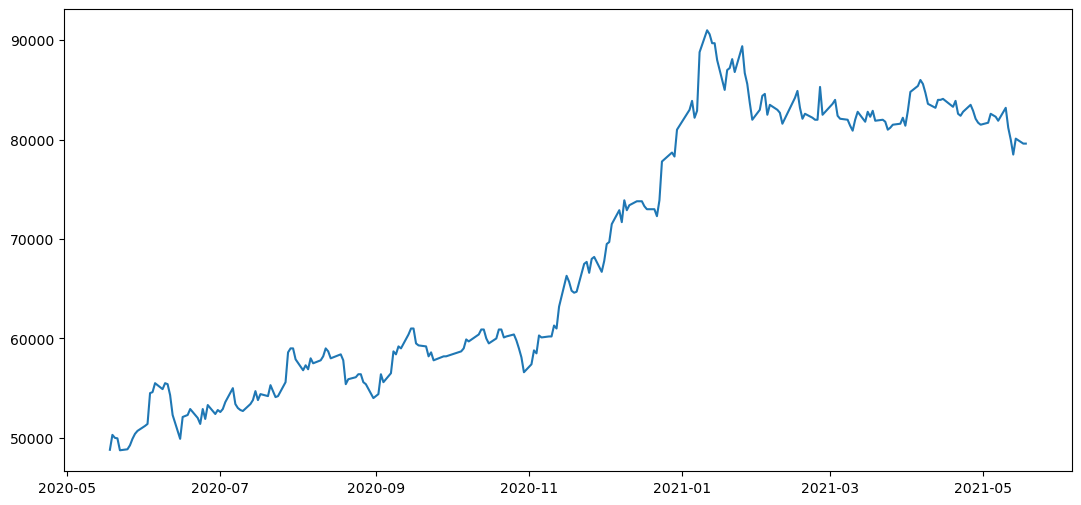

In [112]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13,6

plt.plot(ts)

#### STEP 2 : 각종 전처리 수행

In [113]:
# 결측치 처리
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)


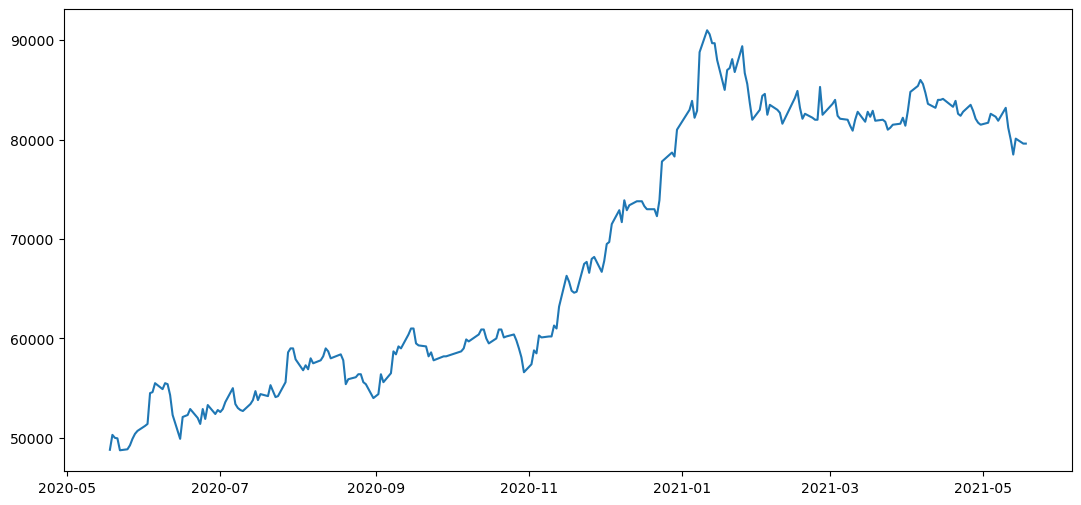

In [114]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts[ts.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts)

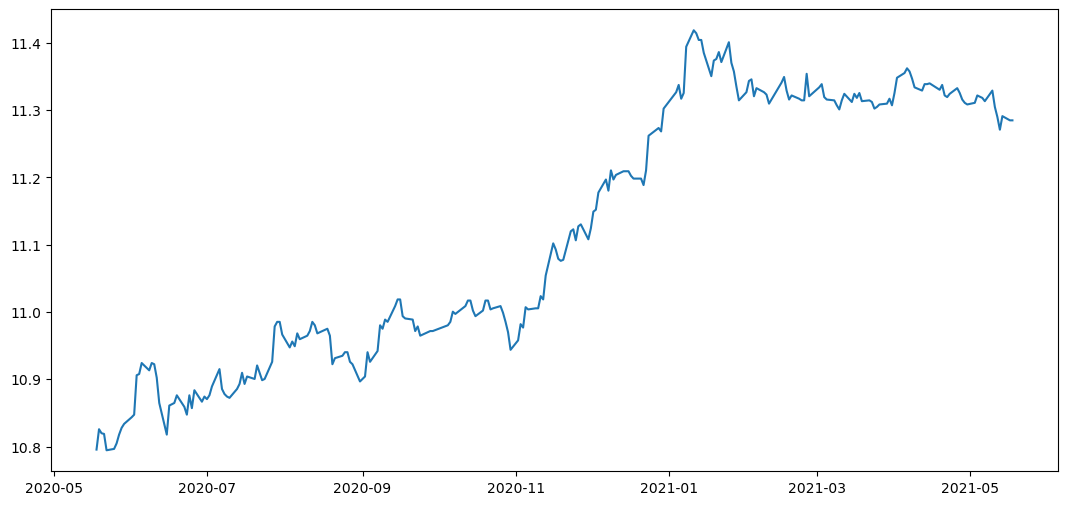

In [115]:
# 로그 변환
ts_log = np.log(ts)
plt.plot(ts_log)

#### STEP 3 : 시계열 안정성 분석

In [116]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [117]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

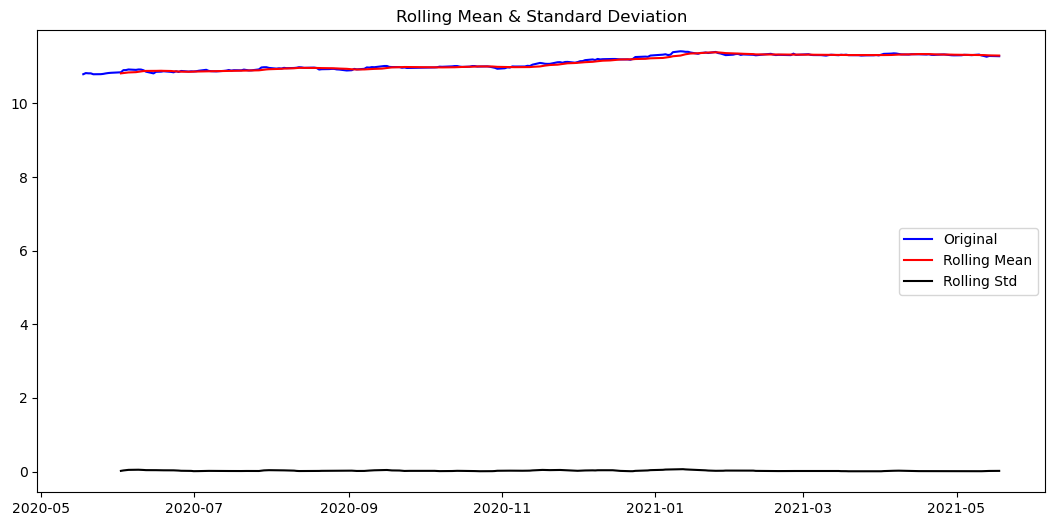

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


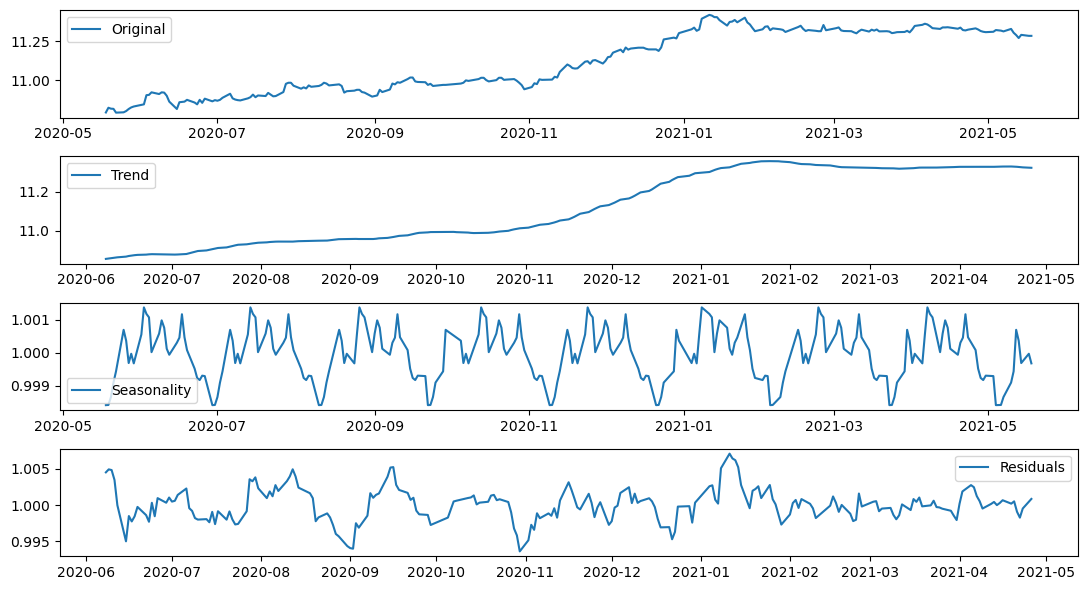

In [118]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

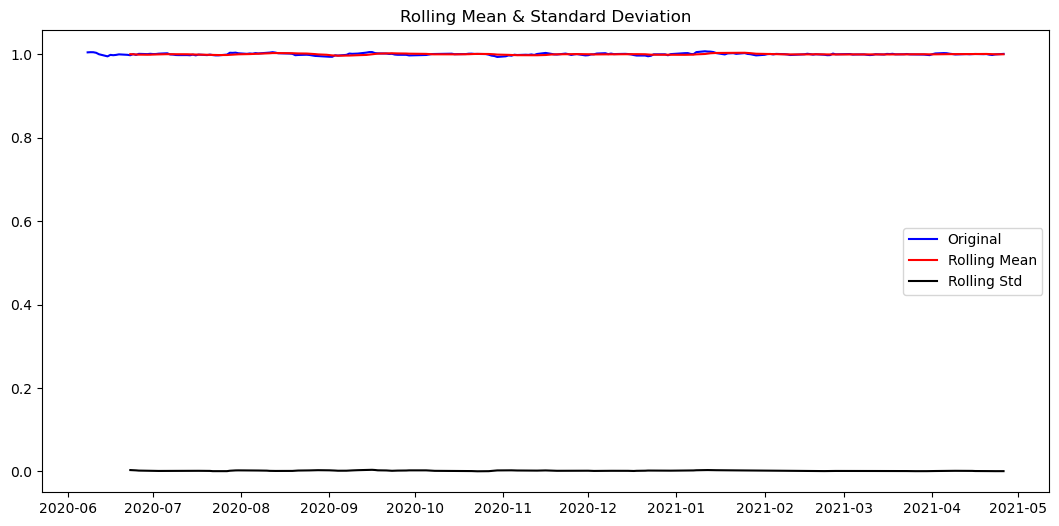

In [119]:
# Residual 안정성 확인
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [120]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


#### STEP 4 : 학습, 테스트 데이터셋 생성

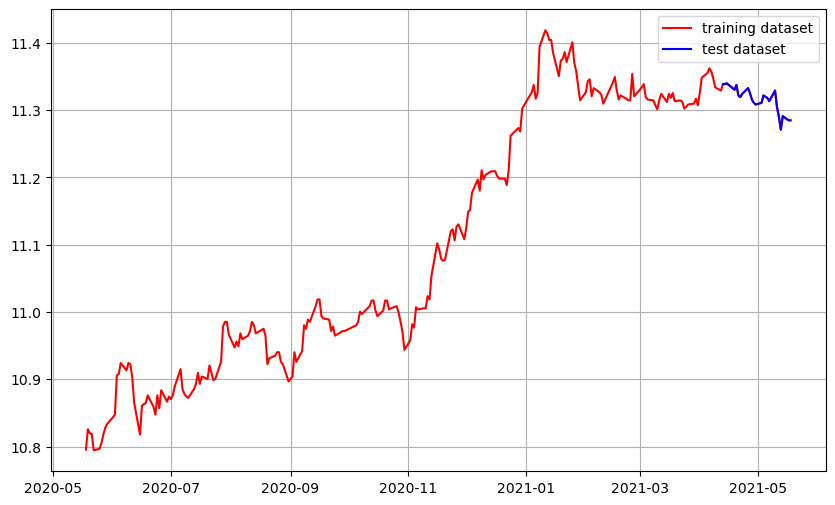

In [121]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [122]:
type(train_data)

pandas.core.series.Series

In [123]:
test_data

Date
2021-04-13    11.338572
2021-04-14    11.338572
2021-04-15    11.339762
2021-04-16    11.337381
2021-04-19    11.330204
2021-04-20    11.337381
2021-04-21    11.321765
2021-04-22    11.319341
2021-04-23    11.324183
2021-04-26    11.332602
2021-04-27    11.325390
2021-04-28    11.315693
2021-04-29    11.310809
2021-04-30    11.308358
2021-05-03    11.310809
2021-05-04    11.321765
2021-05-06    11.318126
2021-05-07    11.313254
2021-05-10    11.329003
2021-05-11    11.304671
2021-05-12    11.289782
2021-05-13    11.270854
2021-05-14    11.291031
2021-05-17    11.284769
2021-05-18    11.284769
Name: Close, dtype: float64

In [124]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-05-18    10.795486
2020-05-19    10.825760
Name: Close, dtype: float64
(225,)
(25,)


#### STEP 5 : 적정 ARIMA 모수 찾기

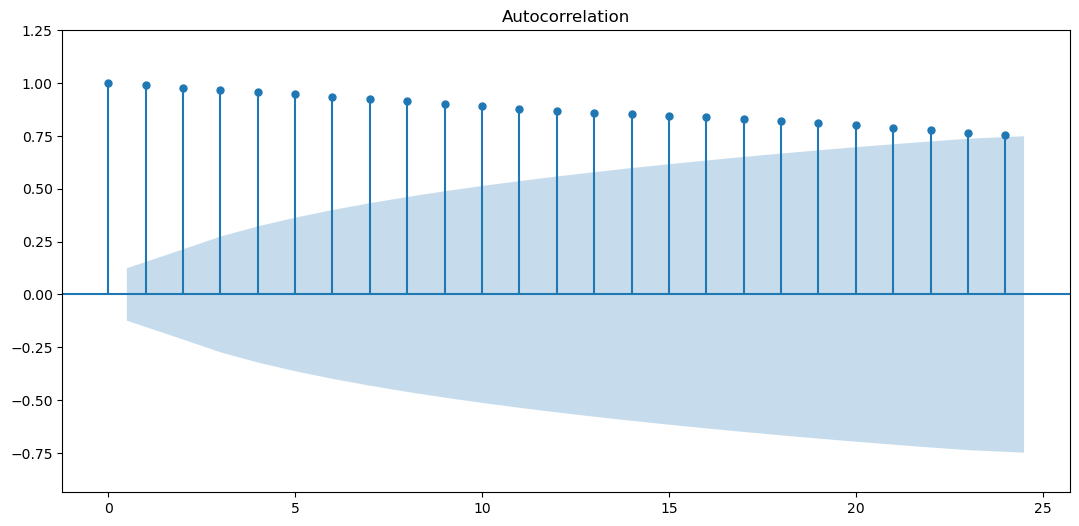

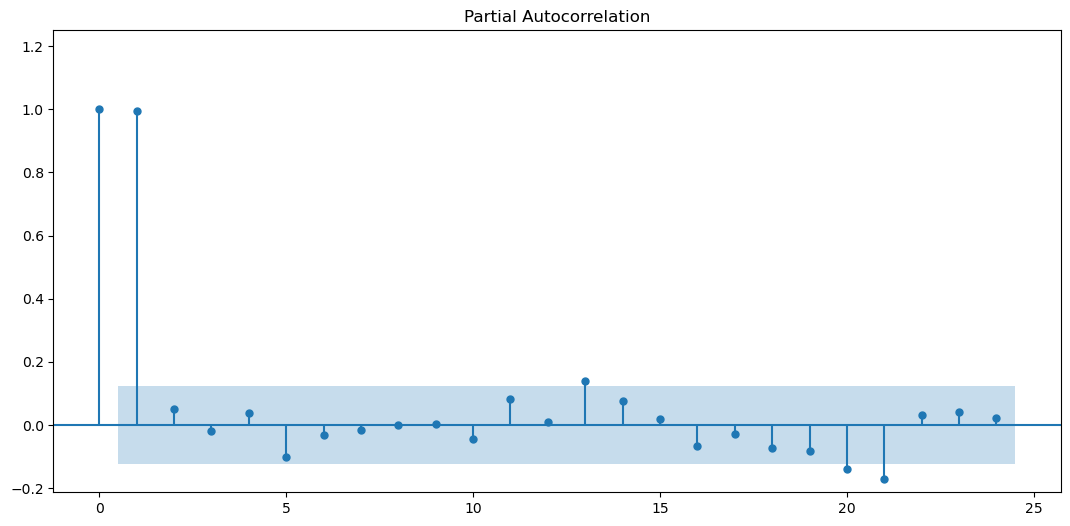

In [125]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log, auto_ylims=True)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log, auto_ylims=True)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

p값은 1이 적당, q값은 24가 적당해보이나 3을 초과할 경우 과적합 될 우려가 있다. 최대치를 3이라고 생각하자.  
1,0,3

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


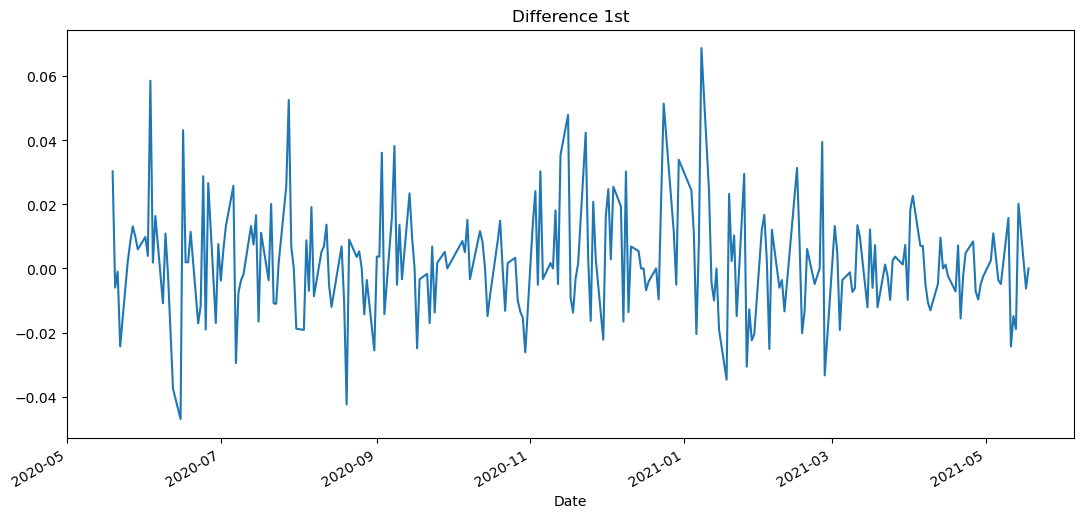

In [126]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

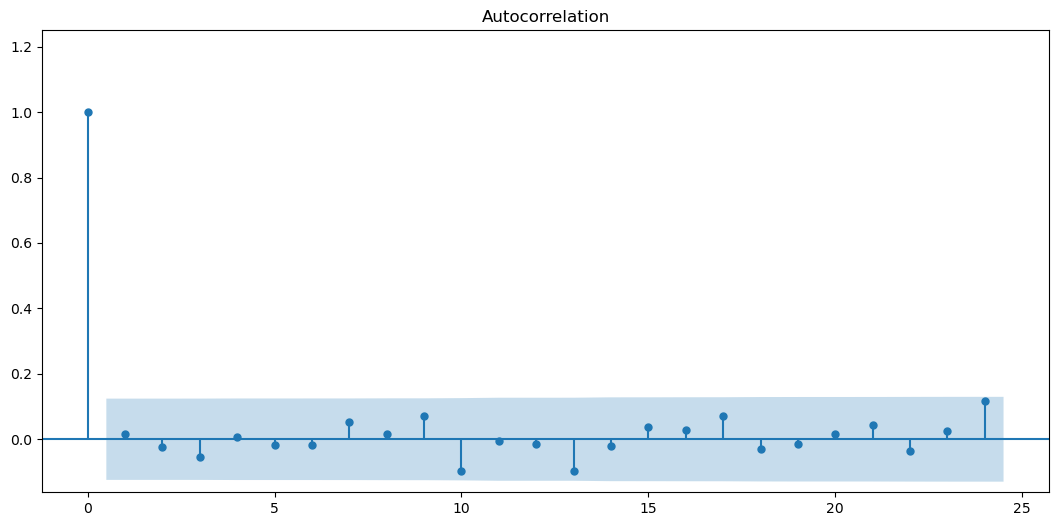

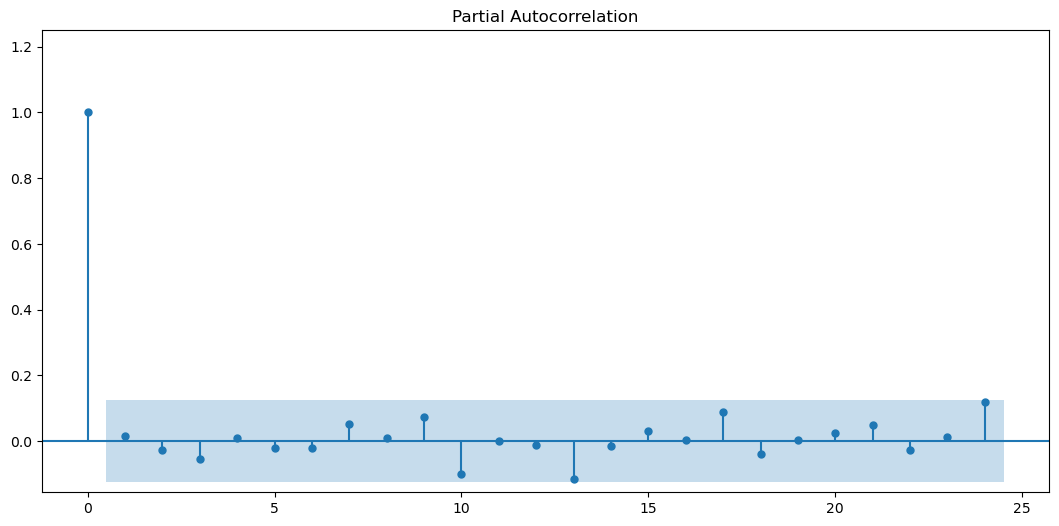

In [127]:

plot_acf(diff_1, auto_ylims=True)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(diff_1, auto_ylims=True)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

1번 차분한 값으로 생각해보면 p,q 모두 0 값이 유력하다.  
0,1,0

In [128]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 0, 3)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 583.727
Date:                Thu, 05 Jan 2023   AIC                          -1155.454
Time:                        22:01:09   BIC                          -1134.958
Sample:                             0   HQIC                         -1147.182
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0623      0.204     54.266      0.000      10.663      11.462
ar.L1          0.9973      0.006    159.218      0.000       0.985       1.010
ma.L1          0.0371      0.063      0.587      0.5

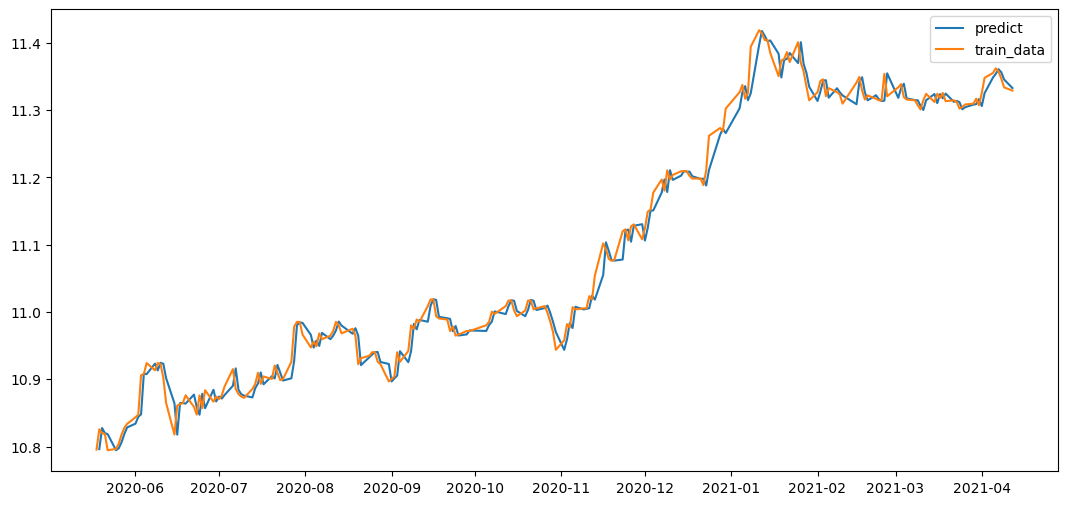

In [129]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

In [130]:
from pmdarima.arima import ndiffs
import pmdarima as pm

In [131]:
model = pm.auto_arima (fitted_m, d = 1, seasonal = False, trace = True)
model.fit(fitted_m)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1138.264, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1145.528, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1143.702, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1143.717, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1143.740, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1142.293, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.647 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [132]:
model = pm.auto_arima (fitted_m, d = 2, seasonal = False, trace = True)
model.fit(fitted_m)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-980.964, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1038.600, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-982.952, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-1065.254, Time=0.16 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-1080.129, Time=0.18 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-1086.727, Time=0.23 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-1090.731, Time=0.20 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-1114.290, Time=1.06 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-1122.197, Time=1.91 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-1123.680, Time=0.90 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-1123.122, Time=0.83 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : A

ARIMA(order=(3, 2, 1), scoring_args={}, suppress_warnings=True)

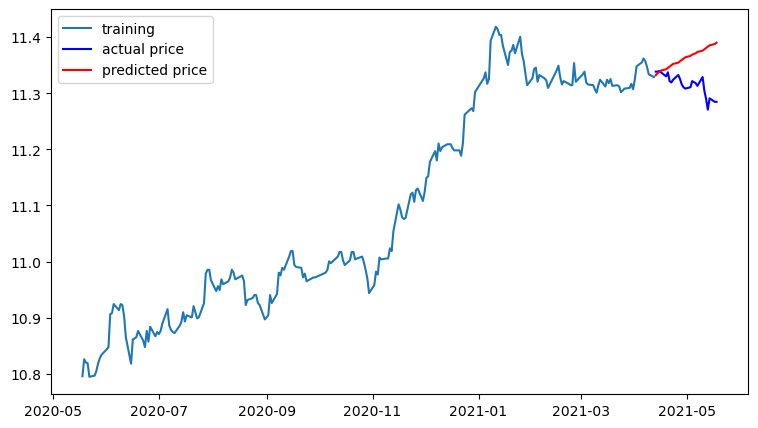

MSE:  23347124.26611332
MAE:  3923.2521838824555
RMSE:  4831.886201693219
MAPE: 4.84%


In [133]:
model = ARIMA(train_data, order=(3, 2, 1))  # 오토아리마 추천값
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc.index = test_data.index

# Make as pandas series
fc_series = pd.Series(data = fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

# 3509600
# 2773512
# 1048973

In [134]:
fc_series

Date
2021-04-13    11.332213
2021-04-14    11.335518
2021-04-15    11.338237
2021-04-16    11.340554
2021-04-19    11.342872
2021-04-20    11.345228
2021-04-21    11.347603
2021-04-22    11.349978
2021-04-23    11.352351
2021-04-26    11.354723
2021-04-27    11.357095
2021-04-28    11.359467
2021-04-29    11.361839
2021-04-30    11.364211
2021-05-03    11.366584
2021-05-04    11.368956
2021-05-06    11.371328
2021-05-07    11.373700
2021-05-10    11.376072
2021-05-11    11.378444
2021-05-12    11.380816
2021-05-13    11.383188
2021-05-14    11.385560
2021-05-17    11.387933
2021-05-18    11.390305
Name: predicted_mean, dtype: float64

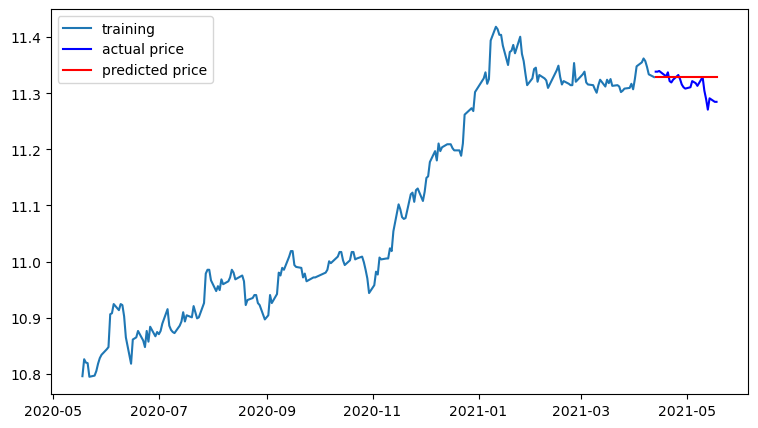

MSE:  3509600.000000066
MAE:  1408.0000000000023
RMSE:  1873.3926443754567
MAPE: 1.74%


In [135]:
model = ARIMA(train_data, order=(0, 1, 0))  # d가 1일때 오토아리마 추천 및 수동 계산 결과
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc.index = test_data.index

# Make as pandas series
fc_series = pd.Series(data = fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

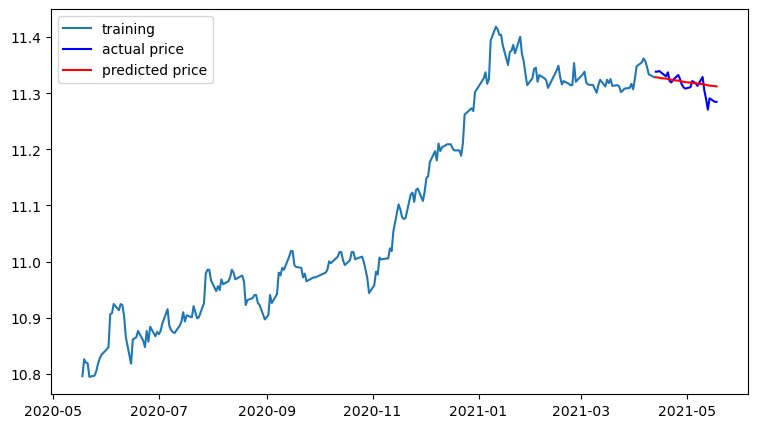

MSE:  1575185.0835628584
MAE:  961.0875800944132
RMSE:  1255.0637766913912
MAPE: 1.18%


In [138]:
model = ARIMA(train_data, order=(1, 0, 3))  # d가 0일때 수동 결과값
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc.index = test_data.index #인덱스 일치하지 않는 오류를 해결하기 위해 추가함! (되는 사람과 아니되는 사람의 차이는 아직 발견못함)

# Make as pandas series
fc_series = pd.Series(data = fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))
 

#1575185 1,0,3 1.18% 
#1078734 1,0,0 1.05%
#1048301 3,0,0 1.03%
#1052831 2,0,0 1.02%
#1041167 1,0,9 1.01% 

In [137]:
#회고

# 1. matplotlib 사용하려면 데이터프레임이 아니라 시리즈를 사용해야한다.
# 2. 결측치를 채울 때 보간법이 있다. ts=ts.interpolate(method='time') 
# 3. 원래 데이터는 트랜드, 시즌 , Residual 를 합한 값이다. 고로, 트렌드와 시즌을 제외시킬 수 있다면 Residual를 추출할 수 있다. 
# 4. 처음 auto-arima를 배웠을 때, 만능인줄 알았으나, 실제 데이터 결과로 보니 오히려 수동으로 찾은 값이 나을 수 있음을 알았다.
# 5. 우선 주식은 완전한 시계열 데이터가 아니므로, 예측값이 흐름을 따라가는 것은 확률적으로 틀릴 확률이 굉장이 높다고 생각한다. mape가 10% 이하라면 좋은 확률이라고 하는데, 그래프 각도가 달라진다. 하지만 어디로 튀어도 이상하지 않는 것은.. (주식을 조금 해 본 입장에선) 당연한 결과다.
# 6. 결국 exp 초반에 설명한 것처럼 시계열 데이터 외에도 다른 데이터를 독립변수로 고려해야한다. (아리맥스가 필요한 타이밍인가?!) 
# 7. 마지막 그래프인 fc_series = pd.Series(data = fc, index=test_data.index) 예측결과가 표시되지 않는 문제가 발생했다.
# 수 많은 이들의 조언으로 fc의 인덱스와 test_data의 인덱스가 일치하지 않는 문제인 것을 알았고, 이를 일치시키기 위해 
# fc.index = test_data.index
# 를 추가했다. 해결! 하지만 누군가는 오류가 발생하지 않고, 누군가는 오류가 발생하는지는 알지 못함.